# WRANGLE AND ANALYZE DATA 

## Table of Contents

- [Introduction](#intro)
- [Part 1 - Wrangling Data](#wrangle)
- [Part 2 - Assessing Data](#assess)
- [Part 3 - Cleaning Data](#clean)  
- [Part 4 - Analyze Data](#analyze)



<a id = 'intro'></a>

### Introduction  
In this project we will wrangle and analyze data of the tweet archive of Twitter user @dog_rates, also known as
WeRateDogs. We will first gather the data from a variety of sources and a variety of formats, assess its quality and tidiness, clean it and then analyze it.  
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. This rating can have a numerator greater than 10 so we can have 13/10, 12/10 and so on. After gathering all the files and cleaning
it we will try to find some insights as who is the best rated dog? Which are the most popular names of dog? or who
are the most famous breeds?

<a id = 'wrangle'></a>

### Part 1 - Wrangling Data
 

To get started let us import all the needed packages

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

Now we can download all the files. The WeRateDogs Twitter archive file has been already download manually.   
Let us download The tweet image predictions file programmatically.

In [2]:
# Save the given URL in the url variable
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# Function to download the file 
def download_file(url):
    local_filename = url.split('/')[-1]       # Store the name of the file 
    with requests.get(url, stream=True) as r: # With stream=True the content is not download
        r.raise_for_status()                  # Raise an exception if the status is 5xx or 4xx
        with open(local_filename, 'wb') as f:  # Open the file in binary mode 
            for chunk in r.iter_content(chunk_size=512): # For loop to read chunk by chunk 
                if chunk:                                # filter out keep-alive new chunks
                    f.write(chunk)                       # Write the chunk in the file
    return local_filename                                # The final file is returned
# Use the function to download the file 
download_file(url)
# Read and Store the file 
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
# Read and store the twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Now we query the twitter data.

In [3]:
## An app has been created and setted up 
#import tweepy
#from tweepy import OAuthHandler
#
#from timeit import default_timer as timer
#
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#
#api = tweepy.API(auth, wait_on_rate_limit = True)
#tweet_ids = twitter_archive.tweet_id.values
#
## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

We read the JSON file line by line to create a pandas DataFrame.

In [4]:
# Create an empty dataframe with needed columns
df_tweets = pd.DataFrame(columns = ['tweet_id', 'favorite_count', 'retweet_count'])
# Read the json file
with open('tweet_json.txt', 'r') as outfile:
    for line in outfile:
        data = json.loads(line)               # Load each line of the json file
        tweet_id = data['id']                 # Store the "id" of that line in the tweet_id variable
        tweet_fav = data['favorite_count']    # Store the "favorite_count" of that line in the tweet_fav variable
        tweet_rt = data['retweet_count']      # Store the "retweet_count" of that line in tweet_rt variable
        # Append each variable to the specific column and store everything in the dataframe, ignore_index is necessary for appending
        df_tweets = df_tweets.append({'tweet_id':tweet_id, 'favorite_count':tweet_fav, 'retweet_count':tweet_rt}, ignore_index = True)

In [5]:
# Check the first rows to see if everything is ok 
df_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37267,7981
1,892177421306343426,32044,5927
2,891815181378084864,24140,3914
3,891689557279858688,40585,8135
4,891327558926688256,38824,8812


<a id = 'assess'></a>

### Part 2 - Assessing Data

After gathering all the data we can assess it to find out if there are Quality issues and tidiness issues.

In [6]:
# Assess visually the twitter archive file
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Checking visually at the dataframe we noticed that there are dogs with name "None", "a", "the", "an", there is a row with rating denominator 2 actually the rating denominator must be 10.  
Let see programmatically what we have.

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The timestamp and retweeted_status_timestamp are string data type but actually must be datetime.  
The doggo, flooter, pupper and pupper columns must be in one column.

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The minimum value of rating_numerator and rating_denominator are 0, even if it is acceptable for the rating numerator, it is impossible for the denominator because the denominator cannot be 0. Even the maximum values are strange 1776 for the rating_numerator and 170 for the rating_denominator, these values are not cosistents.

In [9]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


There are many rows with the rating demoninator different from 10. It seems these ratings have particular meaning
and are not really a rating, for example 24/7 is given just because the dog were smiling 24/7(24 hours a day 7 days a week) to say all the time. Another example is the 4/20 rating that is given about the cannabis celebration taking place in the U.S the on april 20, https://en.wikipedia.org/wiki/420_(cannabis_culture) . But checking at the text we see that the exact rating is 13/20. So here we have an extraction issue, The rating numerator and rating denominator must be of float data type not integer.

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Assessing visually the prediction file we notice that the names of predictions (p1,p2,p3) start sometimes in
uppercase and sometimes in lowercase. We also notice that the name of brees are separated with underscore, must be replaced.

In [11]:
# Assess programatically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# Assess df_tweets
df_tweets

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37267,7981
1,892177421306343426,32044,5927
2,891815181378084864,24140,3914
3,891689557279858688,40585,8135
4,891327558926688256,38824,8812
5,891087950875897856,19502,2932
6,890971913173991426,11388,1945
7,890729181411237888,62865,17788
8,890609185150312448,26839,4033
9,890240255349198849,30740,6947


In [14]:
# Assess programmatically 
df_tweets.sample(10)

,tweet_id,favorite_count,retweet_count
2185,668623201287675904,1407,755
596,796563435802726400,0,7716
1767,677335745548390400,3084,1820
2157,668994913074286592,439,227
1445,694206574471057408,4274,2087
19,888078434458587136,20967,3273
585,798585098161549313,0,6053
164,858860390427611136,0,7997
1286,707059547140169728,2649,691
1003,746131877086527488,7107,2284


In [15]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null object
favorite_count    2332 non-null object
retweet_count     2332 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


The data type of tweet_id is not the same in all 3 files, in this file the type is a string but in the other 2 files the type is integer. The number of rows of df_tweets and twitter_archive are differents. The favorite_count and retweet_count are objects but must be integer.

### Wrap up 

#### Quality Issues

- The data type of the tweet_id is not the same in all three files
- The data type of favorite_count and retweet_count in df_tweets is object 
- The number of rows in image_predictions and twitter_archive are differents
- p1,p2,p3 variables in image_predictions do not start all with Capitalize letter and many values have underscore
- The rating_numerator and rating_denominator have wrong values and should be float data type  
- The timestamp and retweeted_status_timestamp are string data type but actually must be datetime 
- Not valid names for many dogs ("a", "the", "an")
- We only want original ratings that have images.
- Remove useless columns from the final dataframe
- Rename columns of the final file for better understanding 

#### Tidiness Issues

- The doggo, flooter, pupper and puppo columns must be in one column.
- All 3 dataframes must be merge toghether in one dataframe  
- Remove duplicates values from the final dataframe

<a id = 'clean'></a>

### Part 3 - Cleaning Data

Let us create a copy of each dataframe That we will use to for the cleaning section

In [16]:
# Make a copy of each dataframe
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Quality Issues

**The data type of the tweet_id is not the same in all three files**  
**Define** 

Change the data type of tweet_id variable in twitter_archive_clean and image_predictions_clean from integer to string  

**Code**

In [17]:
# Change the datatype of tweet_id column in twitter_archive_clean
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
# Change the datatype of tweet_id column in image_predictions_clean
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
# We also change the data type of df_tweets_clean to string 
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)

**Test**

In [18]:
# Assert that the data type is changed, no output means it is correct 
assert twitter_archive_clean.tweet_id.dtypes == 'object'
assert image_predictions_clean.tweet_id.dtypes == 'object'
assert df_tweets_clean.tweet_id.dtypes == 'object'

**The data type of favorite_count and retweet_count in df_tweets is object**  

**Define**  

Change the data type of retweet_count and favorite_count from object to integer  

**Code**  

In [19]:
# Change the datatype of retweet_count to integer
df_tweets_clean.retweet_count = df_tweets.retweet_count.astype(int)
# Change the datatype of favorite_count to integer
df_tweets_clean.favorite_count = df_tweets.favorite_count.astype(int)

**Test**

In [20]:
# Assert that the datatypes are changed 
assert df_tweets_clean.retweet_count.dtypes == 'int64'
assert df_tweets_clean.favorite_count.dtypes == 'int64'

**The number of rows in image_predictions and twitter_archive are differents**  
**Define**

Remove the rows that are in the image_predictions but not in the twitter_archive dataset.  

**Code**

In [21]:
# Remove the rows with tweet_id in image_predictions but not in twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id.tolist())]

**Test**

In [22]:
# Check if we removed all the rows, No output means it is correct
assert twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id.tolist()) == False].shape[0] == 0

**p1,p2,p3 variables in image_predictions do not start all with Capitalize letter and many values have underscore**  

**Define**  
Capitalize the first letter of the variable p1,p2,p3 and remove the underscore in each word

**Code**


In [23]:
# Remove all the underscores in  each column and capitalize the first letter of each word 
image_predictions_clean[['p1','p2','p3']] = image_predictions_clean[['p1','p2','p3']].apply(lambda x: x.str.replace('_', ' ').str.title())

**Test**  

In [24]:
# Check a sample of the columns
image_predictions_clean[['p1','p2','p3']].sample(5)

,p1,p2,p3
1266,Pomeranian,Chow,Keeshond
1134,Window Shade,Studio Couch,Rotisserie
1665,Loupe,Web Site,Bubble
1623,Labrador Retriever,Golden Retriever,Great Pyrenees
822,Cocker Spaniel,Welsh Springer Spaniel,Golden Retriever


**The rating_numerator and rating_denominator have wrong values and should be float data type**  

**Define**  

Change the data type of the rating_numerator and rating_denominator to float and fix and wrong values

**Code**  

In [25]:
# Find all the indexes with wrong values in rating_denominator  
ind = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d*\/\d+')][['text', 'rating_numerator']].index.tolist()
# Find all the correct values of the rating_numerator with the specifics indexes
correct_values = twitter_archive_clean.text.loc[ind].str.extract(r'(\d+\.\d*)', expand = False)
# Change the wrong values of the rating_numerator with the corrects values
twitter_archive_clean.rating_numerator.loc[ind] = correct_values

In [26]:
# Change the data type of the rating_numerator to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')
# Change the data type of the rating_denominator to float
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')

In [27]:
# Check the values of the denominator different from 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,None,None,None,None


In [28]:
# Check the text of one of this indexes to see the real rate inside
twitter_archive_clean.text.loc[1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [29]:
# We repeat the same process to retrieve manually the correct rating_numerator and denominator we put all in lists
ind2 = [2335, 1068, 1662, 1165] 
# correct numerators for the specifics indexes
correct_values_numerator = [9, 14, 10, 13]
# correct denominator for the specifics indexes
correct_values_denominator = [10, 10, 10, 10]

In [30]:
# Change the rating_numerator of those indexes
twitter_archive_clean.loc[ind2].rating_numerator = correct_values_numerator
# Change the rating_numerator of those indexes
twitter_archive_clean.loc[ind2].rating_denominator = correct_values_denominator

**Test**

In [31]:
# Check if the rating_numerator and rating_denominator are floats, no output means it is correct
assert twitter_archive_clean.rating_numerator.dtypes == 'float'
assert twitter_archive_clean.rating_denominator.dtypes == 'float'

In [32]:
# check if the values of rating_numerator and ranting_denominator for the specifics indexes have changed
twitter_archive_clean[['rating_numerator', 'rating_denominator']].loc[ind + ind2]

,rating_numerator,rating_denominator
45,13.50,10.0
695,9.75,10.0
763,11.27,10.0
1712,11.26,10.0
2335,1.00,2.0
1068,9.00,11.0
1662,7.00,11.0
1165,4.00,20.0


**The timestamp and retweeted_status_timestamp are string data type but actually must be datetime**  
**Define**  

Change the data type of timestamp and retweeted_status_timestamp from object to datetime  

**Code**

In [33]:
# Change the data type of timestamp 
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, format = '%Y-%m-%d %H:%M:%S +0000')
# Change the data type of retweeted_status_timestamp
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp, format = '%Y-%m-%d %H:%M:%S +0000')

**Test**

In [34]:
# Assert that the data types are changed- No output means it is correct
assert twitter_archive_clean.timestamp.dtype == '<datetime64[ns]'
assert twitter_archive_clean.retweeted_status_timestamp.dtype == '<datetime64[ns]'

**Not valid names for many dogs ("a", "the", "an")**  
**Define**  



**Code**

In [35]:
# Find all the invalid names, all the invalid names are lowercase
invalid_names = twitter_archive_clean.name[twitter_archive_clean.name.str.islower()].unique().tolist()
invalid_names

['such',
 'a',
 'quite',
 'one',
 'incredibly',
 'an',
 'very',
 'just',
 'my',
 'not',
 'his',
 'getting',
 'this',
 'unacceptable',
 'all',
 'infuriating',
 'the',
 'actually',
 'by',
 'officially',
 'light',
 'space']

In [36]:
# Give the value None to all the invalid names
for name in twitter_archive_clean.name.tolist():
    if name in invalid_names:
        twitter_archive_clean[twitter_archive_clean.name == name] = None       

In [37]:
# Assert if there is still an invalid name in the dataframe, no output means it is ok
for name in twitter_archive_clean.name.tolist():
    if name in invalid_names:
        print('Invalid Name')

**We only want original ratings that have images.**  
**Define**  
Remove rows with retweet in twitter_archive_clean and keep the rows where prediction is available

**Code**  


In [38]:
# keep rows where retweeted_status_id == NaN
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull() & 
                                              twitter_archive_clean.retweeted_status_id.isnull() & 
                                              twitter_archive_clean.retweeted_status_timestamp.isnull() &
                                              twitter_archive_clean.in_reply_to_status_id.isnull() & 
                                              twitter_archive_clean.in_reply_to_user_id.isnull()]
# Keep rows where prediction is available
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id.tolist())]

**Test**

In [39]:
# Assert there are no rows with retweeted_status_id != NaN, No output means it is correct
assert twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False].shape[0] == 0 
# Assert that all the rows in twitter_archive_clean have a predictions in image_predicitons, No output means it is correct
assert twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id.tolist()).all() == True

#### Tidiness Issues

**The doggo, floofer, pupper and puppo columns in twitter archive must be in one column.**  
**Define**  

Create a new column with all the stages 

**Code**

In [40]:
# Get all the stages differents from None  
real_stages = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
# Function to get all the stages  
def all_stages(row) -> str: 
    if(row.sum() == False):  # If sum of the row equal False
        return 'None'      # We return None
    else:
        if row.sum() > 1:    # otherwise if there is more than one value in the row
            return 'multiple'# We return multiple to specify that there are multiple values for the same row
        return row.idxmax(axis = 1)  # We return the index of the first occurence of maximum for the column  
# We use the function and apply to create the new column with all stages
twitter_archive_clean['dog_stage'] = real_stages.apply(all_stages, axis = 1)

In [41]:
# Drop all the four useless columns
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(stage_columns, axis = 1, inplace = True)

**Test**

In [42]:
# Assert that the columns in value_columns are not in the dataset anymore, No output means it is correct
assert stage_columns not in twitter_archive_clean.columns.tolist()

In [43]:
# Check the dog_stage column
twitter_archive_clean.dog_stage.value_counts()

None        1582
pupper       192
doggo         61
puppo         22
multiple       9
floofer        7
Name: dog_stage, dtype: int64

**All 3 dataframes must be merge toghether in one dataframe**  
**Define**  

Merge all the dataframes in one unique dataframe with the `merge` attribute and `reduce`  

**Code** 

In [44]:
# Load the reduce package
from functools import reduce
# Create a list of all the dataframes,
all_dfs = [twitter_archive_clean, image_predictions_clean, df_tweets_clean]
# Merge all dataframe together on tweet_id
final_clean_df = reduce(lambda left,right:pd.merge(left,right, on = ['tweet_id'], how = 'inner'), all_dfs)

**Test**

In [45]:
# Check the info of the dataframe
final_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 1864
Data columns (total 27 columns):
tweet_id                      1865 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1865 non-null datetime64[ns]
source                        1865 non-null object
text                          1865 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1865 non-null object
rating_numerator              1865 non-null float64
rating_denominator            1865 non-null float64
name                          1865 non-null object
dog_stage                     1865 non-null object
jpg_url                       1865 non-null object
img_num                       1865 non-null int64
p1                            1865 non-null object
p1_conf             

**Remove useless columns from the final dataframe**  
**Define**  

Remove the columns that are useless for analysis

**Code**  



In [46]:
# Remove columns from the final dataframe 
final_clean_df = final_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

**Test**

In [47]:
# Check the columns to see if the columns are correct
final_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

**Rename columns of the final file for better understanding**  
**Define**  

Rename columns name for better understanding using the rename attribute

**Code**  


In [48]:
# Rename columns names
final_clean_df = final_clean_df.rename(columns = {'name':'dog_name', 'jpg_url':'image_url', 'img_num':'image_number',
                                                  'p1':'prediction_1', 'p1_conf':'confidence_1', 'p2':'prediction_2',
                                                  'p2_conf':'confidence_2', 'p3':'prediction_3', 'p3_conf':'confidence_3',
                                                  'p1_dog':'dog_prediction_1', 'p2_dog':'dog_prediction_2', 
                                                  'p3_dog':'dog_prediction_3'})

**Test**

In [49]:
# Check the columns name to see the changes
final_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage',
       'image_url', 'image_number', 'prediction_1', 'confidence_1',
       'dog_prediction_1', 'prediction_2', 'confidence_2', 'dog_prediction_2',
       'prediction_3', 'confidence_3', 'dog_prediction_3', 'favorite_count',
       'retweet_count'],
      dtype='object')

**Remove duplicates columns from the final dataframe**  
**Define**  

Remove all the duplicates values from the final_clean_df with drop_duplicates attribute

**Code**

In [50]:
# Remove duplicates values
final_clean_df.drop_duplicates(inplace = True)

**Test**

In [51]:
# Assert if there are duplicated values
assert final_clean_df.duplicated().all() == False

**Store the final file**

In [52]:
final_clean_df.to_csv('twitter_archive_master.csv',index = False, encoding = 'utf-8')

<a id = 'analyze'></a>

### Analyze Data

Before analyzing the data we have to read it first.

In [53]:
# Read the master file 
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', parse_dates = [1])

In [54]:
# Check the info
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 22 columns):
tweet_id              1865 non-null int64
timestamp             1865 non-null datetime64[ns]
source                1865 non-null object
text                  1865 non-null object
expanded_urls         1865 non-null object
rating_numerator      1865 non-null float64
rating_denominator    1865 non-null float64
dog_name              1865 non-null object
dog_stage             1865 non-null object
image_url             1865 non-null object
image_number          1865 non-null int64
prediction_1          1865 non-null object
confidence_1          1865 non-null float64
dog_prediction_1      1865 non-null bool
prediction_2          1865 non-null object
confidence_2          1865 non-null float64
dog_prediction_2      1865 non-null bool
prediction_3          1865 non-null object
confidence_3          1865 non-null float64
dog_prediction_3      1865 non-null bool
favorite_count        1865 n

In [55]:
# Check some statistics
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,image_number,confidence_1,confidence_2,confidence_3,favorite_count,retweet_count
count,1.865000e+03,1865.000000,1865.000000,1865.000000,1865.000000,1.865000e+03,1.865000e+03,1865.000000,1865.000000
mean,7.375203e+17,12.183260,10.401609,1.206434,0.594947,1.339671e-01,6.011242e-02,8686.994638,2584.937802
std,6.775560e+16,42.519787,5.923792,0.563330,0.273415,1.008081e-01,5.107045e-02,12594.700807,4600.837266
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,75.000000,11.000000
25%,6.766175e+17,10.000000,10.000000,1.000000,0.360071,5.328100e-02,1.588320e-02,1948.000000,583.000000
50%,7.101532e+17,11.000000,10.000000,1.000000,0.587764,1.163170e-01,4.899880e-02,3939.000000,1262.000000
75%,7.906988e+17,12.000000,10.000000,1.000000,0.853170,1.947420e-01,9.214290e-02,10860.000000,2945.000000
max,8.924206e+17,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,160996.000000,80600.000000


Let us check at the most frequent names of dogs.

**Top 10 famous names of dogs**

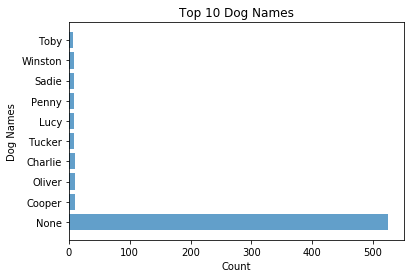

In [56]:
# Find the number of occurence of the top 10 names and store in names_10
num_10 = twitter_archive_master.dog_name.value_counts()[:10].tolist()
# Find the 10 breeds with the higher occurences and store in breeds_10
names_10 = twitter_archive_master.dog_name.value_counts()[:10].index.tolist()
# Arrange the position 
y_position = np.arange(len(names_10))
# Plot a horizontal bar plot
plt.barh(y_position, num_10, align = 'center', alpha = 0.7)
plt.yticks(y_position, names_10)  # Set locations and labels 
plt.xlabel('Count')       # Label the x coordinate
plt.ylabel('Dog Names')      # label the y coordinate
plt.title('Top 10 Dog Names') # Title of the plot 
plt.show();

The most frequent names are *Oliver*, *Cooper* and *Charlie*, obviously there are many dogs(more than 500) without name.

In [57]:
# Check all the breeds that have the name Oliver
twitter_archive_master[twitter_archive_master.dog_name == 'Oliver'].prediction_1

15                             Whippet
217                            Leopard
314     American Staffordshire Terrier
653                   Golden Retriever
738                  Shetland Sheepdog
854                            Samoyed
955                                Pug
982                               Chow
1057                   Norfolk Terrier
1450                Labrador Retriever
Name: prediction_1, dtype: object

There is no correlation between the name and the breed, the name *Oliver* exist for different type of breeds.

**Top 10 Breeds with confidence prediction higher than 0.8**

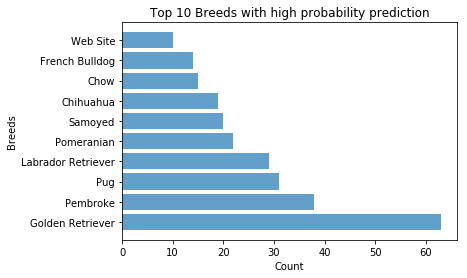

In [58]:
# Find the number of occurence of the top 10 breeds and store in count_10
count_10 = twitter_archive_master[twitter_archive_master.confidence_1 > 0.8].prediction_1.value_counts()[:10].tolist()
# Find the 10 breeds with the higher occurences and store in breeds_10
breeds_10 = twitter_archive_master[twitter_archive_master.confidence_1 > 0.8].prediction_1.value_counts()[:10].index.tolist()
# Arrange the position 
y_position = np.arange(len(breeds_10))
# Plot a horizontal bar plot
plt.barh(y_position, count_10, align = 'center', alpha = 0.7)
plt.yticks(y_position, breeds_10)  # Set locations and labels 
plt.xlabel('Count')       # Label the x coordinate
plt.ylabel('Breeds')      # label the y coordinate
plt.title('Top 10 Breeds with high probability prediction') # Title of the plot 
plt.show();

The Golden Retriever is the breed with most preditions with confidence higher than 0.8, follow by Pembroke and Pug.

**Most famous rated dog**

In [59]:
# Find the dogs with the max rating_denominator
twitter_archive_master[twitter_archive_master.rating_numerator == twitter_archive_master.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,image_url,...,confidence_1,dog_prediction_1,prediction_2,confidence_2,dog_prediction_2,prediction_3,confidence_3,dog_prediction_3,favorite_count,retweet_count
704,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5274,2543


Atticus seems to be the best rated dog with a rating numerator of 1776, but going deep we see that the prediction was not accurate. In fact it was predicted to be a Bow Tie with a confidence of `0.53` (which is a little bit low). This is due to the [image](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg) where the dog is too covered.  
This value is too high because it is more a meaning than a rating in fact 1776 represents [the independance day of the USA](https://en.wikipedia.org/wiki/1776_in_the_United_States).

In [60]:
twitter_archive_master[twitter_archive_master.rating_numerator == twitter_archive_master.rating_numerator.max()].text

704    This is Atticus. He's quite simply America af....
Name: text, dtype: object

**Breeds with the higest favorite count**

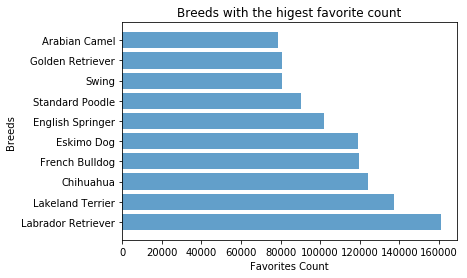

In [61]:
# Find the number of occurence of the top 10 breeds and store in count_10
number_10 = twitter_archive_master.favorite_count.sort_values(ascending = False)[:10]
# Find the 10 breeds with the higher occurences and store in breeds_10
# Arrange the position 
breeds = twitter_archive_master.prediction_1.loc[number_10.index]
# Plot a horizontal bar plot
plt.barh(breeds, number_10, align = 'center', alpha = 0.7)
plt.xlabel('Favorites Count')       # Label the x coordinate
plt.ylabel('Breeds ')      # label the y coordinate
plt.title('Breeds with the higest favorite count') # Title of the plot 
plt.show();

The Labrador Retriever is the Breed with the highest favorite count(160996).But we notice that there are two breeds 
that are not really breeds, **Arabian Camel** and the **Swing**, this means that the prediction 1 is not always 
correct. Let us go deep to see what really happens here.

In [62]:
# Check all the predicitons for the Arabian Camel with the highest favorite count
twitter_archive_master[twitter_archive_master.index == 389].image_url

389    https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
Name: image_url, dtype: object

We notice that the probability 1 to have an Arabian Camel is slow(0.366) and was predicted not to be a dog, we just have a very slow probability(0.04) to a dog (Cocker Spaniel). Check at the image we are sure that it is a [dog](https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg), but as the image is fuzzy it is difficult to understand if it is a Cocker Spaniel or no. So in this case the dog_prediction 3 is true and the prediction 3 to be a Cocker Spaniel could be True.